# Autoencoders - Fasion MNIST dataset

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential
from sklearn import metrics

## Carregamento dos dados

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Tratamento dos dados

In [3]:
# Normalização dos pixels para o intervalo [0, 1]
max_val = X_train.max()
print(max_val)
X_train = X_train / max_val
X_test = X_test / max_val

# Transforma as imagens em vetores unidimensionais de 784 px (28 x 28)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

255


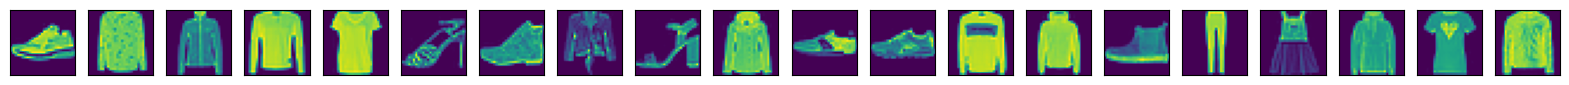

In [4]:
# Visualiza algumas amostras
n = 20
indexes = np.random.choice(len(X_train), n)
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
# Aplica ruído nos dados e armazena em variáveis acessórias
factor = .1
X_train_noisy = X_train + factor * np.random.normal(loc=0.0, scale=1.,
                                                    size=X_train.shape)
X_test_noisy = X_test + factor * np.random.normal(loc=0.0, scale=1.,
                                                  size=X_test.shape)

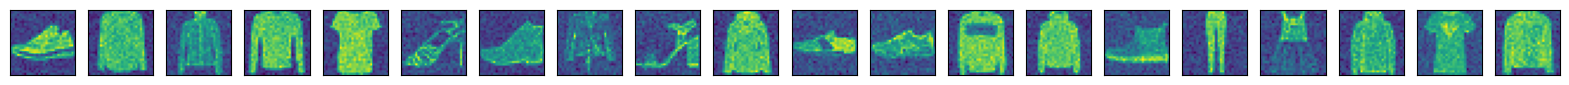

In [6]:

# Visualiza as amostras com ruído
n = 20
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train_noisy[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Construção do modelo autoencoder

In [7]:
# Define a dimensão da representação codificada
n_latent = 60
input_dim = X_train.shape[1]

# Cria o modelo do autoencoder
model = Sequential()
model.add(Dense(units=400, input_dim=input_dim, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=n_latent, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=input_dim, activation='sigmoid'))

# Compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

e:\workspace\ciencia-dados\fashion_mnist\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Treinamento com dados originais e validação com dados sem ruídos


In [8]:
# Treina o autoencoder
model.fit(X_train, X_train, epochs=30, batch_size=256, shuffle=True,
          validation_data=(X_test, X_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4259 - val_loss: 0.3081
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3017 - val_loss: 0.2954
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2912 - val_loss: 0.2916
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2866 - val_loss: 0.2869
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2828 - val_loss: 0.2836
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2807 - val_loss: 0.2822
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2786 - val_loss: 0.2800
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2768 - val_loss: 0.2782
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2757 - val_loss: 0.2770
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2749 - val_loss: 0.2760
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2733 - val_loss: 0.2752
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

In [9]:
# Codifica e decodifica as imagens de teste sem ruido
encoded_imgs = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


## Comparação dos dados originais e dos dados gerados - Sem ruído


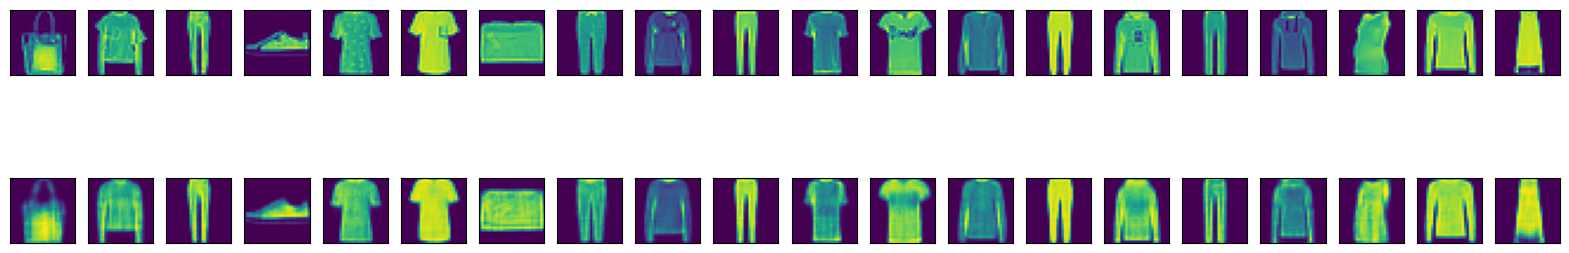

In [10]:
n = 20
indexes = np.random.choice(X_test.shape[0], n)
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Validação com dados com ruído usando o modelo treinado

In [11]:
# Codifica e decodifica as imagens de teste com ruído
endoded_imgs = model.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Comparação dos dados originais e dos dados gerados - Com ruído


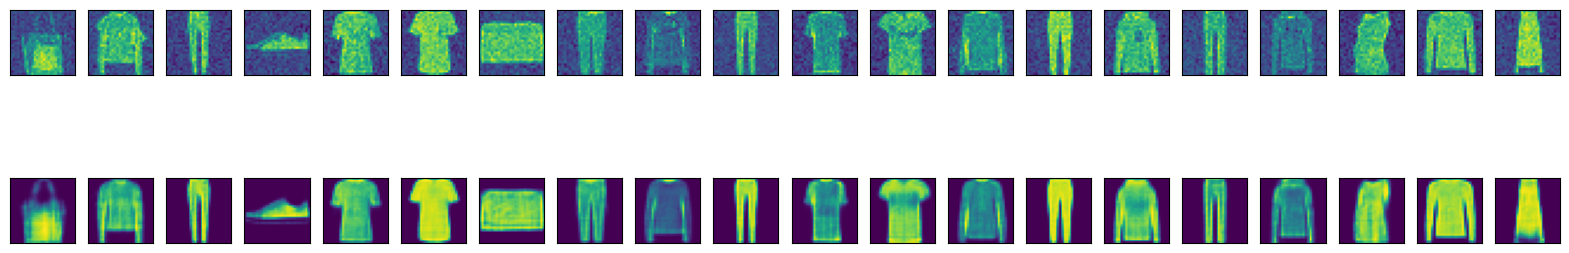

In [12]:
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Criação de modelo classificador para testar as amostrar ruidosas, amostras originais e amostras recuperadas com ruído


In [13]:
# dropout = .45
input_dim = X_train.shape[1]
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=input_dim, activation='relu'))
# model2.add(Dropout(dropout))  # Essa camada evita overfitting
model2.add(Dense(units=100, activation='relu'))
# model12.add(Dropout(dropout))
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [14]:
# Treina o modelo
model2.fit(X_train, y_train, epochs=40, batch_size=256)


Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7404 - loss: 0.7454
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8616 - loss: 0.3849
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3428
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8875 - loss: 0.3117
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3007
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.2784
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9056 - loss: 0.2567
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9070 - loss: 0.2490
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9086 - loss: 0.2416
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.2337
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9145 - loss: 0.2276
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [15]:
# Verifica a acurácia
loss, acc = model2.evaluate(X_test, y_test)
print(f'\nTeste de Acurácia - Classificação sem ruído: {acc * 100:.1f}')
loss, acc = model2.evaluate(X_test_noisy, y_test)
print(f'\nTeste de Acurácia - Classificação com ruído: {acc * 100:.1f}')
loss, acc = model2.evaluate(endoded_imgs, y_test)
print(f'\nTeste de Acurácia - Classificação das imagens recuperadas com ruído: {acc * 100:.1f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8881 - loss: 0.4614

Teste de Acurácia - Classificação sem ruído: 88.9
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8653 - loss: 0.5876

Teste de Acurácia - Classificação com ruído: 86.5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8568 - loss: 0.5601

Teste de Acurácia - Classificação das imagens recuperadas com ruído: 85.4


## Apresentando as métricas com o sklearn

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
Avaliação da classificação
Acurácia: 88.9%
MSE: 1.5349

Relatório de classificação das amostras não apresentadas no treinamento
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.77      0.80      1000
           3       0.91      0.89      0.90      1000
           4       0.81      0.82      0.82      1000
           5       0.95      0.97      0.96      1000
           6       0.67      0.78      0.72      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Matriz de confusão das amostras não apresentadas no treinamento:


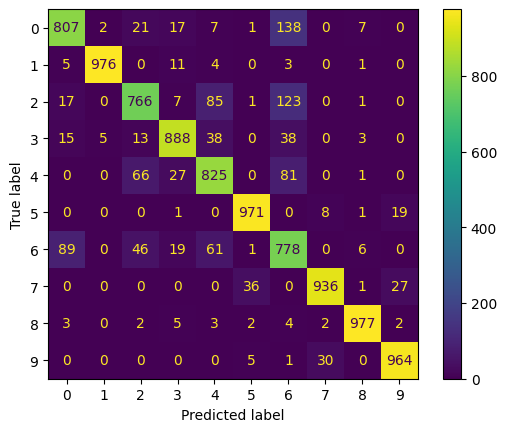

In [16]:
y_pred = model2.predict(X_test)

# Converte as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print(f'Avaliação da classificação')
print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred):.1%}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print('\nRelatório de classificação das amostras não apresentadas no treinamento')
report = metrics.classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])
print(report)
print('\nMatriz de confusão das amostras não apresentadas no treinamento:')
cm_display = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred),
                               display_labels=[str(i) for i in range(10)])
cm_display.plot();